#Reproduce quickstart for ClimSim

In [3]:
import xarray as xr
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/leap-stc/ClimSim

Cloning into 'ClimSim'...
remote: Enumerating objects: 4506, done.
remote: Counting objects: 100% (811/811), done.
remote: Compressing objects: 100% (357/357), done.
remote: Total 4506 (delta 461), reused 718 (delta 441), pack-reused 3695
Receiving objects: 100% (4506/4506), 140.16 MiB | 22.64 MiB/s, done.
Resolving deltas: 100% (1554/1554), done.
Updating files: 100% (2068/2068), done.


In [4]:
os.chdir('/content/ClimSim')
os.getcwd()

'/content/ClimSim'

In [5]:
pip install .

Processing /content/ClimSim
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00
  Created wheel for climsim-utils: filename=climsim_utils-0.0.1-py3-none-any.whl size=14489 sha256=c3b92c116ee9e32255353ff3ba0b06acd411930d10c6e9fcd546b5ef001bd1ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-81zhlqqs/wheels/a2/10/6e/125ae0c7cf1c521a7afaa0ba206e930d032a286728ae1a9103
Successfully built climsim-utils


###Import data_utils

In [6]:
from climsim_utils.data_utils import *

###Instantiate class

In [7]:
# Paths to data files

grid_path = '/content/ClimSim/grid_info/ClimSim_low-res_grid-info.nc'
norm_path = '/content/ClimSim/preprocessing/normalizations/'

# Load data using xarray
grid_info = xr.open_dataset(grid_path)
input_mean = xr.open_dataset(norm_path + 'inputs/input_mean.nc')
input_max = xr.open_dataset(norm_path + 'inputs/input_max.nc')
input_min = xr.open_dataset(norm_path + 'inputs/input_min.nc')
output_scale = xr.open_dataset(norm_path + 'outputs/output_scale.nc')

# Assuming `data_utils` and `set_to_v1_vars()` are defined or imported correctly
data = data_utils(grid_info=grid_info,
                  input_mean=input_mean,
                  input_max=input_max,
                  input_min=input_min,
                  output_scale=output_scale)

# Set variables to V1 subset
data.set_to_v1_vars()

###Load training and validation data

In [8]:
from google.colab import drive
drive.mount("/content/drive")

#upload 6 files to google drive and update data path
data_path ='/content/drive/MyDrive/ADS Project3/'

Mounted at /content/drive


In [9]:
train_input_path = data_path + 'train_input.npy'
train_target_path = data_path + 'train_target.npy'
val_input_path = data_path + 'val_input.npy'
val_target_path = data_path + 'val_target.npy'

subset data and save as new file to googledrive

In [10]:
np.random.seed(123)
sampled_indices=np.random.randint(1,1441920,size=100224)

In [11]:
# data.target_val = data.load_npy_file(val_target_path)[sampled_indices,:]
# np.shape(data.target_val)

In [12]:
# data.input_train = data.load_npy_file(train_input_path)[1:10091520:384]
# np.save('/content/drive/MyDrive/ADS Project3/sub_data/input_train_sub.npy',data.input_train)

In [13]:
# del data.input_train

In [14]:
#data.target_val = data.load_npy_file(val_target_path)[sampled_indices,:]# [1:1441920:384]
# np.save('/content/drive/MyDrive/ADS Project3/sub_data/target_val_sub.npy',data.target_val)

In [15]:
# del data.target_val

In [16]:
#data.target_train = data.load_npy_file(train_target_path)[1:1441920:384]
# np.save('/content/drive/MyDrive/ADS Project3/sub_data/target_train_sub.npy',data.target_train)

In [17]:
# del data.target_train

In [18]:
# data.input_val = data.load_npy_file(val_input_path)[sampled_indices,:]#[1:1441920:384]
# np.save('/content/drive/MyDrive/ADS Project3/sub_data/input_val_sub.npy',data.input_val)

In [19]:
# del data.input_val

In [20]:
# data.input_train = data.load_npy_file(train_input_path)[1:10091520:100]
# data.target_train = data.load_npy_file(train_target_path)[1:10091520:100]
# data.input_val = data.load_npy_file(val_input_path)[1:1441920:100]
# data.target_val = data.load_npy_file(val_target_path)[1:1441920:100]

In [21]:
#print(data.input_train.shape, data.target_train.shape, data.input_val.shape, data.target_val.shape)

In [22]:
# data.input_train = data.load_npy_file(train_input_path)
# data.target_train = data.load_npy_file(train_target_path)
# data.input_val = data.load_npy_file(val_input_path)
# data.target_val = data.load_npy_file(val_target_path)

In [23]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [24]:
!ls "/content/drive/My Drive/"


'ADS Project3'	'Colab Notebooks'


In [25]:
import os
print(os.listdir('/content/drive/My Drive/ADS Project3/'))


['scoring_input.npy', 'scoring_target.npy', 'val_input.npy', 'val_target.npy', 'train_input.npy', 'train_target.npy', 'ADS Project 3 Reproducibility Report.gdoc', 'sub_data', '.ipynb_checkpoints']


In [26]:
data_path = '/content/drive/My Drive/ADS Project3/sub_data/'
sub_train_input_path = data_path + 'input_train_sub.npy'
sub_train_target_path = data_path + 'target_train_sub.npy'
sub_val_input_path = data_path + 'input_val_sub.npy'
sub_val_target_path = data_path + 'target_val_sub.npy'

In [27]:
data.input_train = data.load_npy_file(sub_train_input_path)
data.target_train = data.load_npy_file(sub_train_target_path)
data.input_val = data.load_npy_file(sub_val_input_path)
data.target_val = data.load_npy_file(sub_val_target_path)
print(data.input_train.shape, data.target_train.shape, data.input_val.shape, data.target_val.shape)

(26280, 124) (26280, 128) (100224, 124) (100224, 128)


###Train models
Train constant prediction model
$Ŷ = E[y_{train}]$

In [28]:
const_model = data.target_train.mean(axis = 0)

Train multiple linear regression model
\begin{align*}
    \beta = (X_{train}^T X_{train})^{-1} X_{train}^T  y_{train} ;
    ŷ = X_{input}^T \beta
\end{align*}
where $X_{train}$ and $X_{input}$ correspond to the training data and the input data you would like to inference on, respectively. $X_{train}$ and $X_{input}$ both have a column of ones concatenated to the feature space for the bias.

adding bias unit

In [29]:
X = data.input_train
bias_vector = np.ones((X.shape[0], 1))
X = np.concatenate((X, bias_vector), axis=1)

create model

In [30]:
mlr_weights = np.linalg.inv(X.transpose()@X)@X.transpose()@data.target_train

In [31]:
print(X)

[[-2.05387198e-03 -7.44582154e-03 -4.19182740e-02 ...  2.71250475e-02
  -1.30903842e-02  1.00000000e+00]
 [-9.02998261e-04 -8.59358441e-03 -6.08404726e-02 ...  3.42741087e-02
  -1.15003642e-02  1.00000000e+00]
 [ 7.82632793e-04  3.40112881e-03 -5.85342832e-02 ...  4.47953418e-02
  -1.06408037e-02  1.00000000e+00]
 ...
 [-2.21918989e-03 -9.35383514e-03 -4.59236093e-02 ... -5.60821667e-02
  -2.65773423e-02  1.00000000e+00]
 [-1.83177134e-03 -8.71408824e-03 -3.99606712e-02 ... -6.00201227e-02
  -2.61745919e-02  1.00000000e+00]
 [-1.97068974e-03 -2.00725626e-02 -4.94166985e-02 ... -5.92304654e-02
  -2.60701459e-02  1.00000000e+00]]


### Reproducing Encoder-decoder (ED)

* Encoder-decoder architectures can handle inputs and outputs that both consist of variable-length sequences and thus are suitable for sequence-to-sequence problems such as machine translation.
* The encoder takes a variable-length sequence as input and transforms it into a state with a fixed shape.
* The decoder maps the encoded state of a fixed shape to a variable-length sequence.

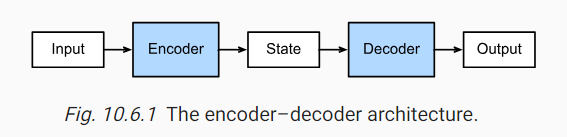

In [74]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler,CSVLogger


import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import tensorflow as tf
import tensorflow.keras as ke

In [75]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # print number of available GPUs


original_dim_input=124  # MMF input node size

original_dim_output=int(128) # MMF target node size


# network hyperparameters:
latent_dim=5 # define the latent space width
input_shape = (original_dim_input,) # define input shape of Encoder
decoder_input_shape=(latent_dim,) # define input shape of Decoder
out_shape=(original_dim_output,) # define target shape of Decoder
intermediate_dim = 463 # define node size of first and last hidden layers of Encoder or Decoder (Behrens2022)
batchsize=714 # define batchsize of training (Behrens2022)

# load input and target data of training and validation date set

# training data
train_input=data.input_train # specify path to train_input.npy file
train_output=data.target_train # specify path to train_target.npy fie

# validation data
val_input=data.input_val # specify path to val_input.npy file
val_output=data.target_val # specify path to val_target.npy file

Num GPUs Available:  0


In [76]:
# Construct Encoder model based on Behrens2022

input_lay=Input(shape=input_shape, name='encoder_input')
x_0 =Dense(intermediate_dim, activation='relu')(input_lay)
x_1 =Dense(intermediate_dim, activation='relu')(x_0)
x_2 =Dense(intermediate_dim/2, activation='relu')(x_1)
x_3 =Dense(intermediate_dim/4, activation='relu')(x_2)
x_4 =Dense(intermediate_dim/8, activation='relu')(x_3)
x_5 =Dense(intermediate_dim/16, activation='relu')(x_4)
x_6 =Dense(latent_dim, activation='relu')(x_5)

encoder=Model(input_lay,x_6, name='encoder') # build Encoder model
encoder.summary() # show structure of Encoder


# Construct Decoder model based on Behrens2022

input_decoder=Input(shape=decoder_input_shape, name='decoder_input')
x_0 =Dense(intermediate_dim/16, activation='relu')(input_decoder)
x_1 =Dense(intermediate_dim/8, activation='relu')(x_0)
x_2 =Dense(intermediate_dim/4, activation='relu')(x_1)
x_3 =Dense(intermediate_dim/2, activation='relu')(x_2)
x_4 =Dense(intermediate_dim, activation='relu')(x_3)
x_5 =Dense(intermediate_dim, activation='relu')(x_4)
output_lay= Dense(original_dim_output,activation='elu')(x_5)

decoder = Model(input_decoder, output_lay, name='decoder') #build Decoder
decoder.summary() # show structure of Decoder

# Connect Encoder and Decoder
decoder_outputs=decoder(encoder(input_lay))

# build ED
ED=Model(input_lay,decoder_outputs, name='ED')
ED.summary() # show structure of ED


# compile ED with learning rate of 0.0001 (adjusted to ClimSim data set) and define further metrics
ED.compile(ke.optimizers.Adam(lr=0.0001), loss=mse, metrics=['mse','mae','accuracy']) # add. metrics = mse, mae and accuracy


lr_init= 0.0001 # set initial learning rate for learning rate scheduler

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 124)]             0         
                                                                 
 dense (Dense)               (None, 463)               57875     
                                                                 
 dense_1 (Dense)             (None, 463)               214832    
                                                                 
 dense_2 (Dense)             (None, 231)               107184    
                                                                 
 dense_3 (Dense)             (None, 115)               26680     
                                                                 
 dense_4 (Dense)             (None, 57)                6612      
                                                                 
 dense_5 (Dense)             (None, 28)                1624

In [79]:
# set learning rate schedule
def schedule(epoch):
    """
    learning rate scheduler based on Behrens 2022, divides lr after each 7th epoch by factor 5
    """


    if epoch < 7:

        return lr_init
    elif epoch < 14:

        return lr_init/5

    elif epoch < 21:

        return lr_init/25

    elif epoch < 28:
        return lr_init/125

    elif epoch < 35:
        return lr_init/625

    elif epoch<42:
        return lr_init/3125



callback_lr=LearningRateScheduler(schedule,verbose=1) # use callback for lr scheduler

csv_logger = CSVLogger('../ED_ClimSIM_1_3.csv') # define path where history of training is stored

# model training over 40 epochs based on Behrens2022, shuffle set to true
ED.fit(x=train_input,y=train_output,validation_data=(val_input,val_output),epochs=40,shuffle=True,
        callbacks=[callback_lr,csv_logger])

ED.save('../ED_ClimSIM_1_3_model.h5')


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/40
822/822 [==============================] - 35s 42ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0215 - accuracy: 0.9799 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.0602 - val_accuracy: 0.9517 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2/40
822/822 [==============================] - 29s 35ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0213 - accuracy: 0.9814 - val_loss: 0.0225 - val_mse: 0.0225 - val_mae: 0.0629 - val_accuracy: 0.9544 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/40
822/822 [==============================] - 36s 44ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0212 - accuracy: 0.9814 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.0661 - val_accuracy: 0.9546 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/40
822/822 [==============================] - 40s 48ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Reproducing Conditional variational autoencoder (cVAE)

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from tools import progress

In [63]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


class VariationalEncoder(torch.nn.Module):
    """
    Conditional VAE Encoder with <layers>+1 fully connected layer
    """
    def __init__(self, in_dims, hidden_dims=512, latent_dims=3, layers=1, dropout=0):
        super().__init__()
        self.linears = []
        for i in range(layers):
            self.linears += [torch.nn.Sequential(
                torch.nn.Linear(in_dims if i == 0 else hidden_dims, hidden_dims),
                torch.nn.LayerNorm(hidden_dims),
                torch.nn.Dropout(p=dropout))
                ]
            self.add_module('linear%d' % i, self.linears[-1])
        self.linear_mean = torch.nn.Linear(hidden_dims, latent_dims)
        self.linear_logstd = torch.nn.Linear(hidden_dims, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.to(device)
        self.N.scale = self.N.scale.to(device)
        self.kl = 0

    def forward(self, y, x, return_latent=False):
        y = torch.cat([y, x], 1)
        y = torch.flatten(y, start_dim=1)
        for linear in self.linears:
            y = torch.nn.functional.relu(linear(y))
        mu = self.linear_mean(y)
        if return_latent:
            return mu
        else:
            sigma = torch.exp(self.linear_logstd(y))
            z = mu + sigma * self.N.sample(mu.shape)
            self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).mean()
            return z


In [64]:
class Decoder(torch.nn.Module):
    """
    Conditional VAE Decoder with <layers>+1 fully connected layer
    """
    def __init__(self, out_dims, hidden_dims=512, latent_dims=3, layers=1, dropout=0):
        super().__init__()
        self.linears = []
        for i in range(layers):
            self.linears += [torch.nn.Sequential(
                torch.nn.Linear(latent_dims if i == 0 else hidden_dims, hidden_dims),
                torch.nn.LayerNorm(hidden_dims),
                torch.nn.Dropout(p=dropout))
                ]
            self.add_module('linear%d' % i, self.linears[-1])
        self.final_linear1 = torch.nn.Linear(hidden_dims, out_dims)
        # self.final_linear2 = torch.nn.Linear(hidden_dims, out_dims)
        self.final_log_std1 = torch.nn.Linear(hidden_dims, out_dims)
        # self.final_log_std2 = torch.nn.Linear(hidden_dims, out_dims)
        # self.final_lambda = torch.nn.Linear(hidden_dims, 1)
        # self.final_prob_zero = torch.nn.Linear(hidden_dims, out_dims)

    def forward(self, z, x):
        z = torch.cat([z, x], 1)
        for linear in self.linears:
            z = torch.nn.functional.relu(linear(z))
        m1 = self.final_linear1(z)
        # m2 = self.final_linear2(z)
        s1 = torch.exp(self.final_log_std1(z))
        # s2 = torch.exp(self.final_std2(z))
        # lam = self.final_lambda
        # p0 = torch.sigmoid(self.final_prob_zero(z))
        return m1, s1


In [65]:
class ConditionalVAE(torch.nn.Module):
    def __init__(self, beta=0.01, data_dims=124, label_dims=128,
                 latent_dims=3, hidden_dims=512, layers=2, dropout=0):
        """
        Conditional VAE
        Encoder: [y x] -> [mu/sigma] -sample-> [z]
        Decoder: [z x] -> [y_hat]

        Inputs:
        -------
        beta - [float] trade-off between KL divergence (latent space structure) and reconstruction loss
        data_dims - [int] size of x
        label_dims - [int] size of y
        latent_dims - [int] size of z
        hidden_dims - [int] size of hidden layers
        layers - [int] number of layers, including hidden layer
        """
        super().__init__()
        self.latent_dims = latent_dims
        self.label_dims = label_dims
        # Encoder and Decoder are conditioned on x of size data_dims
        self.encoder = VariationalEncoder(label_dims + data_dims, hidden_dims, latent_dims, layers, dropout)
        self.decoder = Decoder(label_dims, hidden_dims, latent_dims + data_dims, layers, dropout)
        self.beta = beta

    def forward(self, y, x, return_latent=False, batch_norm=False):
        # Normalize
        if batch_norm:
            x_m, x_s = x.mean(axis=0), x.std(axis=0)
            y_m, y_s = y.mean(axis=0), y.std(axis=0)
            mx, my = x_s != 0, y_s != 0
            x[:, mx] = x[:, mx] / x_s[mx] - x_m[mx]
            y[:, my] = y[:, my] / y_s[my] - y_m[my]
        z = self.encoder(y, x, return_latent)
        if return_latent:
            return z
        else:
            y_hat_mean, y_hat_std = self.decoder(z, x)
            if batch_norm:
                y_hat_mean = (y_hat_mean + y_m) * y_s
            return y_hat_mean, y_hat_std

    def sample(self, x, random=True):
        """
        Sample conditionally on x

        Inputs:
        -------
        x - [BxN array] label
        random - [boolean] if true sample latent variable from prior else use all-zero vector
        """
        if random:
            # Draw from prior
            z = self.encoder.N.sample([x.shape[0], self.latent_dims])
        else:
            # Set to prior mean
            z = torch.zeros([x.shape[0], self.latent_dims]).to(device)
        mean_y, std_y = self.decoder(z, x)
        if random:
            # add output noise
            y = mean_y + self.encoder.N.sample(mean_y.shape) * std_y
            # y = torch.zeros_like(mean_y)
            # nz = torch.rand(y.shape).to(device) > p0
            # y[nz] = mean_y[nz] + self.encoder.N.sample([(nz == 1).sum()]) * std_y[nz]
            return y
        else:
            return mean_y, std_y

    def trainer(self, data, epochs=20, save="models/vae.cp", plot=True, loss_type='mse',
                optimizer='adam', lr=0.0001, weight_decay=0):
        """
        Train the Conditional VAE

        Inputs:
        -------
        data - [DataLoader] - training data
        epochs - [int] number of epochs
        loss_type - [str] type of loss
        optimizer - [str] type of optimizer
        lr - [float] learning rate
        weight_decay - [float] L2 regularization
        save - [str] file path to save trained model to after training (and after every 20 minutes)
        plot - [boolean] if plots of loss curves and samples should be produced
        """
        # Training parameters
        if optimizer == 'adam':
            opt = torch.optim.Adam(self.parameters(), lr=lr, weight_decay=weight_decay)
        elif optimizer == 'sgd':
            opt = torch.optim.SGD(self.parameters(), lr=lr, weight_decay=weight_decay)
        else:
            raise ValueError('Unknown optimizer')

        # Train and checkpoint every 20 minutes
        losses = []
        for epoch, batch in progress(range(epochs), inner=data, text='Training',
                                     timed=[(1200, lambda: torch.save(self.state_dict(), save))]):
            x = batch['x'].to(device)
            y = batch['y'].to(device)

            opt.zero_grad()
            y_mean, y_std = self(y, x)
            # y_mean, y_std, p0 = self(y, x)
            if loss_type == 'mse':
                # iid gaussians -> mse
                # y_hat = y_mean + self.encoder.N.sample([x.shape[0], 128]) * y_std
                # loss = ((y - y_hat) ** 2).sum() / self.label_dims + self.beta * self.encoder.kl / self.latent_dims

                # means, so beta' = beta * label_dims / latent_dims
                loss = (0.5 * (y - y_mean) ** 2 / y_std + torch.log(y_std)).mean() + self.beta * self.encoder.kl
                # model as p0 * N(0, 1/1000) + (1-p0) * N(mean, std)
                # loss = (p0 * y**2).sum() + ((1 - p0) * ((y - y_mean) ** 2 / y_std + torch.log(y_std))).mean() + self.beta * self.encoder.kl
            else:
                raise ValueError('Unknown loss')

            torch.clip(loss, min=-1e5, max=1e5).backward()
            losses += [loss.item()]
            opt.step()
        print('Last-epoch loss: %.2f' % sum(losses[-len(data):-1]))
        print('Finished Training')

        if plot:
            y_hat = y_mean + self.encoder.N.sample([x.shape[0], 128]) * y_std
            plt.plot(np.array(losses)[:-1])
            plt.savefig('results/tmp_loss.png')
            fig, ax = plt.subplots(4, 1, sharey=True, figsize=(12, 8))
            ax[0].plot((y[0:500] - y_mean[0:500]).detach().cpu().numpy().T, c="C0", alpha=1/100)
            ax[1].plot((y[0:500] - y_hat[0:500]).detach().cpu().numpy().T, c="C0", alpha=1/100)
            ax[2].plot((y[0:500] - self.sample(x[0:500])).detach().cpu().numpy().T, c="C0", alpha=1/100)
            ax[3].plot((y[0:500] - self.sample(x[0:500], random=False)[0]).detach().cpu().numpy().T, c="C0", alpha=1/100)
            ax[0].set_ylabel('y - rec. sample')
            ax[1].set_ylabel('y - rec. mean')
            ax[2].set_ylabel('y - sample')
            ax[3].set_ylabel('y - mean')
            ax[0].set_ylim([-0.5, 0.5])
            plt.tight_layout()
            plt.savefig('results/tmp_last_batch.png')
            # plt.show()
            plt.close('all')

###Train your models here： XGBoost

● One of most popular implementations of gradient boosting

● Fast approximate split finding based on histograms

● Supports GPU training, sparse data & missing values

● Adds l1 and l2 penalties on leaf weights

● Monotonicity & feature interaction constraints

● Works well with pipelines in sklearn due to a compatible interface

● Does not support categorical variables natively

#### What is Gradient Boosting?
Gardient Boosting works for both classification and regression
tasks. It trains regression trees in a sequential manner
on modified versions of the datasets.Every tree is trained on the residuals of the data points obtained by subtracting the predictions from the previous tree.

Weights for each classifier (estimated during
the training process) are used to combine the
outputs and make the final prediction

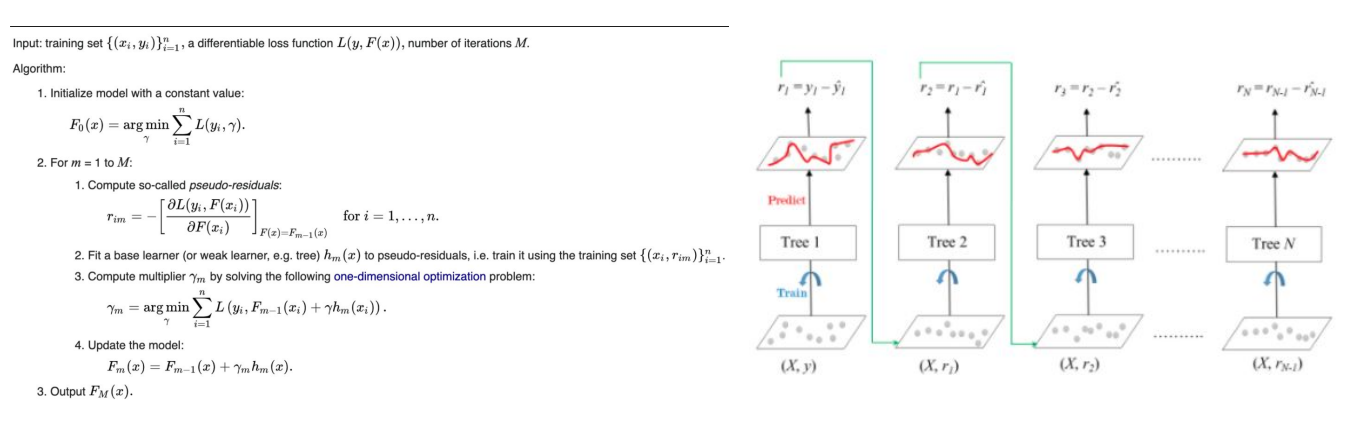

In [32]:
import xgboost as xgb

# Convert your training and validation data into DMatrix format
dtrain = xgb.DMatrix(data.input_train, label=data.target_train)
dvalid = xgb.DMatrix(data.input_val, label=data.target_val)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse',            # root mean squared error
    'eta': 0.1,                       # learning rate
    'max_depth': 6,                   # maximum depth of the decision trees
    'subsample': 0.8,                 # fraction of training data to train the trees
    'colsample_bytree': 0.8,          # fraction of features to train the trees
}

# Training the model
evals = [(dtrain, 'train'), (dvalid, 'eval')]
num_round = 100
bst = xgb.train(params, dtrain, num_round, evals, early_stopping_rounds=10, verbose_eval=True)

# Predict on validation set
preds = bst.predict(dvalid)

# Now, you can evaluate the predictions using your desired metric, for example RMSE.




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-rmse:0.17666	eval-rmse:0.18921
[1]	train-rmse:0.16088	eval-rmse:0.17487
[2]	train-rmse:0.14659	eval-rmse:0.16201
[3]	train-rmse:0.13412	eval-rmse:0.15107
[4]	train-rmse:0.12372	eval-rmse:0.14252
[5]	train-rmse:0.11345	eval-rmse:0.13381
[6]	train-rmse:0.10436	eval-rmse:0.12633
[7]	train-rmse:0.09665	eval-rmse:0.12030
[8]	train-rmse:0.08975	eval-rmse:0.11489
[9]	train-rmse:0.08357	eval-rmse:0.11031
[10]	train-rmse:0.07858	eval-rmse:0.10696
[11]	train-rmse:0.07369	eval-rmse:0.10359
[12]	train-rmse:0.06974	eval-rmse:0.10113
[13]	train-rmse:0.06622	eval-rmse:0.09913
[14]	train-rmse:0.06323	eval-rmse:0.09731
[15]	train-rmse:0.06057	eval-rmse:0.09585
[16]	train-rmse:0.05808	eval-rmse:0.09442
[17]	train-rmse:0.05595	eval-rmse:0.09327
[18]	train-rmse:0.05418	eval-rmse:0.09237
[19]	train-rmse:0.05265	eval-rmse:0.09160
[20]	train-rmse:0.05133	eval-rmse:0.09119
[21]	train-rmse:0.05013	eval-rmse:0.09082
[22]	train-rmse:0.04910	eval-rmse:0.09044
[23]	train-rmse:0.04829	eval-rmse:0.09022
[2

####XGBoost for Evaluation

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(data.target_val, preds))
print(f"RMSE for your XGBoost model on the validation set is: {rmse:.4f}")


RMSE for your XGBoost model on the validation set is: 0.0906


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on validation set
preds = bst.predict(dvalid)

# True values
true_values = data.target_val

# Compute MAE
mae = mean_absolute_error(true_values, preds)
print(f"MAE: {mae}")

# Compute RMSE
rmse = mean_squared_error(true_values, preds, squared=False)  # squared=False gives RMSE
print(f"RMSE: {rmse}")

# Compute R^2
r2 = r2_score(true_values, preds)
print(f"R^2: {r2}")

# Compute Bias
bias = (preds - true_values).mean()
print(f"Bias: {bias}")


MAE: 0.03916122019290924
RMSE: 0.06238256394863129
R^2: -1484751544.264304
Bias: -0.0004949120921082795


In [35]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load scoring data
data.target_scoring = np.load('/content/drive/MyDrive/ADS Project3/sub_data/target_scoring_sub.npy')
data.input_scoring = np.load('/content/drive/MyDrive/ADS Project3/sub_data/input_scoring_sub.npy')

# Convert your scoring data into DMatrix format
dscoring = xgb.DMatrix(data.input_scoring)

# Predict on scoring data
preds_scoring = bst.predict(dscoring)

# Calculate evaluation metrics
mae = mean_absolute_error(data.target_scoring, preds_scoring)
rmse = np.sqrt(mean_squared_error(data.target_scoring, preds_scoring))
r2 = r2_score(data.target_scoring, preds_scoring)
bias = np.mean(preds_scoring - data.target_scoring)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(f"Bias: {bias}")


MAE: 0.037556275725364685
RMSE: 0.0899917334318161
R^2: -51182.02104726771
Bias: -0.0006914614350534976


After we evaluate the validation data and scoring data, for XGBoost, we could see that the Bias and RMSE is lower but the R-Square score is negative. The prediction by using XGBoost is precise in a way. However, it is a little ambiguous for researchers to use XGBoost in this scheme data to predict. Since R2= 1 - SSres/SStot, if SSres is larger than SStot, R2 will be negative. This can happen when we fit a unsuitbale chosen model (perhaps by mistake?) or doesn't meet some contraints of the model. All in all, the performance of XGBoost Algorithm is a alternative choice of prediction, but not a good one.

**Moreover, from the reproducing process above, we find that the method Encoder-decoder(ED) did a better job in evaluation and prediction of our data. Higher accuracy, lower MAE and MSE than our exploration method: XGBoost.**

#Evaluate on validation data

Set pressure grid

In [80]:
data.set_pressure_grid(data_split = 'val')

Load predictions

In [81]:
# Constant Prediction
const_pred_val = np.repeat(const_model[np.newaxis, :], data.target_val.shape[0], axis = 0)
print(const_pred_val.shape)

# Multiple Linear Regression
X_val = data.input_val
bias_vector_val = np.ones((X_val.shape[0], 1))
X_val = np.concatenate((X_val, bias_vector_val), axis=1)
mlr_pred_val = X_val@mlr_weights
print(mlr_pred_val.shape)

# Load your prediction here

# Load predictions into data_utils object
data.model_names = ['const', 'mlr'] # add names of your models here
preds = [const_pred_val, mlr_pred_val] # add your custom predictions here
data.preds_val = dict(zip(data.model_names, preds))

(100224, 128)
(100224, 128)


###Weight predictions and target


1.   Undo output scaling
2. Weight vertical levels by dp/g
3. Weight horizontal area of each grid cell by a[x]/mean(a[x])
4. Convert units to a common energy unit




In [82]:
data.reweight_target(data_split = 'val')
data.reweight_preds(data_split = 'val')

Set and Calculate Metrics

In [83]:
data.metrics_names = ['MAE', 'RMSE', 'R2', 'bias']
data.create_metrics_df(data_split = 'val')

/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: invalid value encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: invalid value encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time




Create Plots

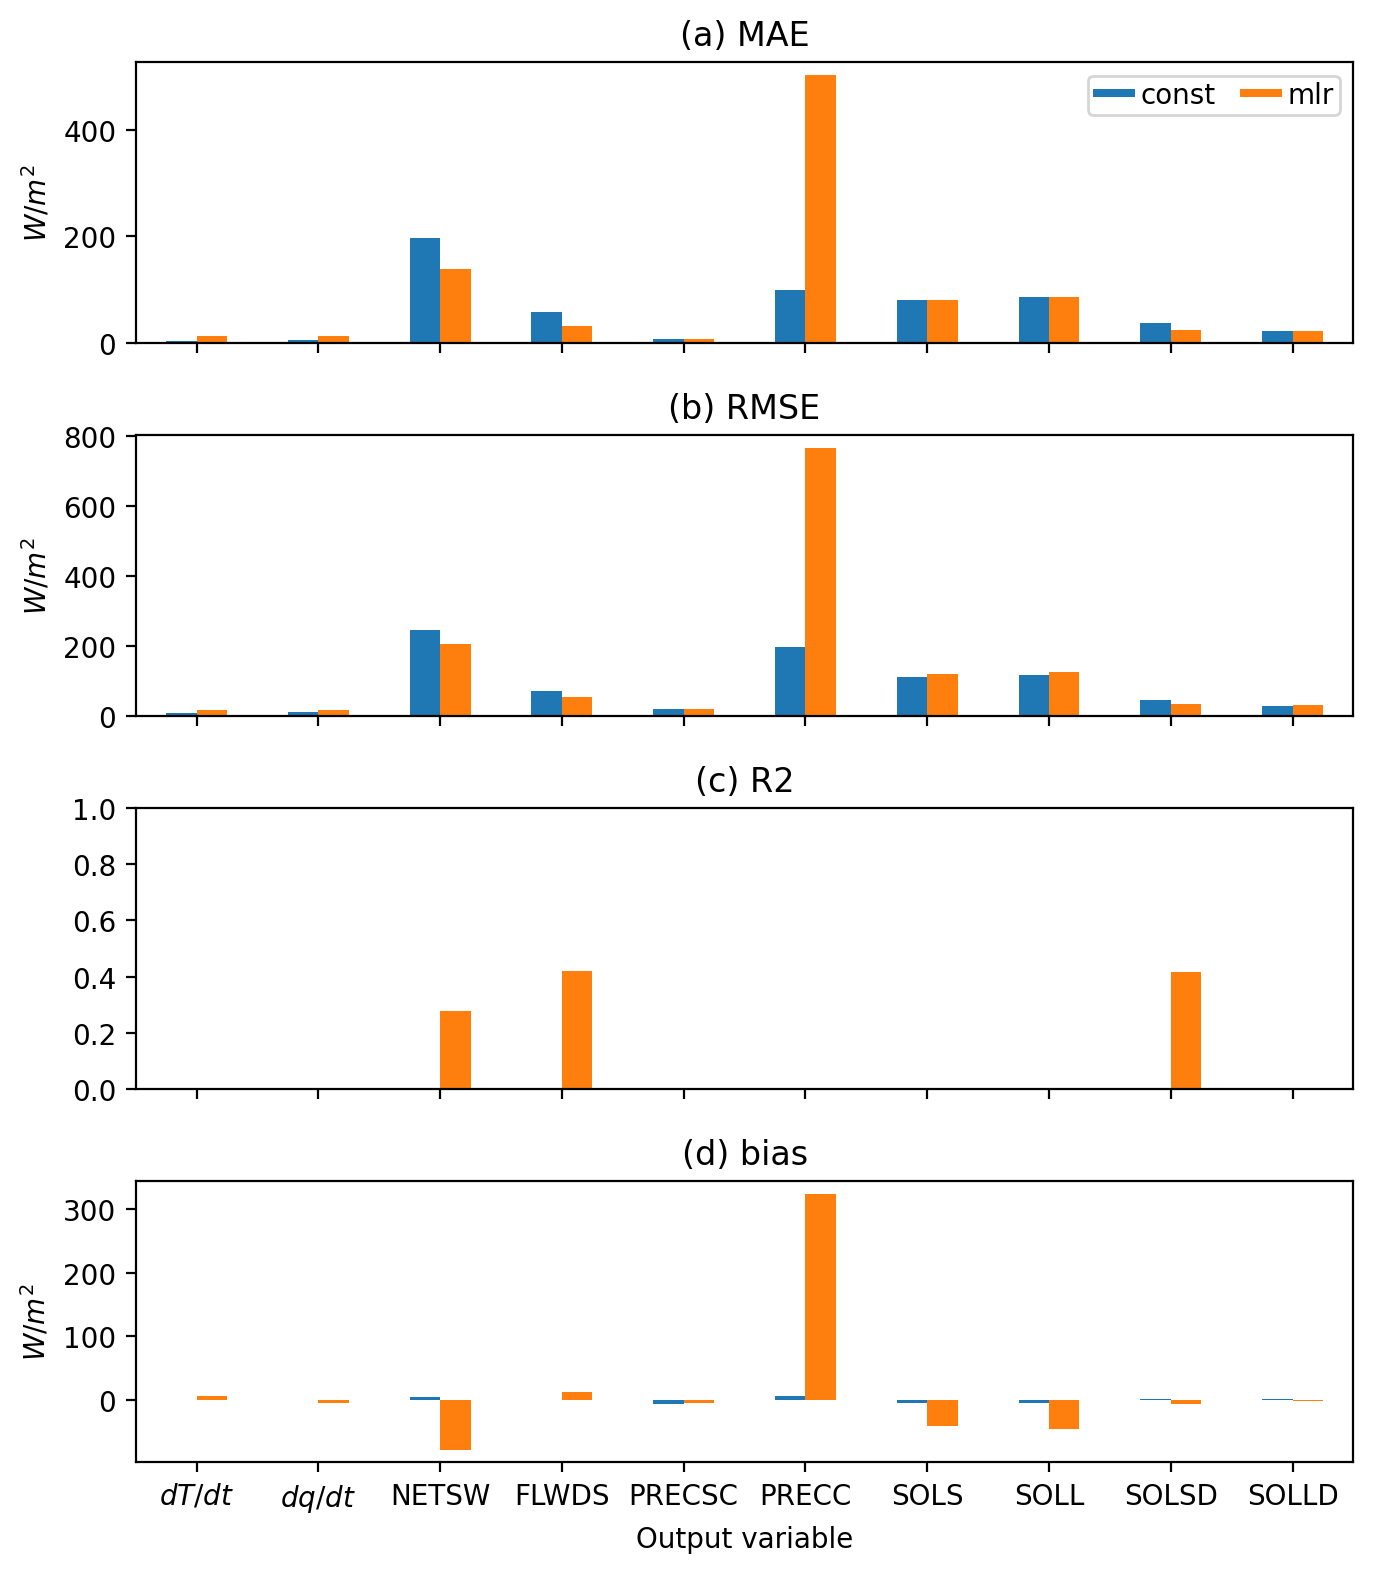

In [84]:
# set plotting settings
%config InlineBackend.figure_format = 'retina'
letters = string.ascii_lowercase

# create custom dictionary for plotting
dict_var = data.metrics_var_val
plot_df_byvar = {}
for metric in data.metrics_names:
    plot_df_byvar[metric] = pd.DataFrame([dict_var[model][metric] for model in data.model_names],
                                               index=data.model_names)
    plot_df_byvar[metric] = plot_df_byvar[metric].rename(columns = data.var_short_names).transpose()

# plot figure
fig, axes = plt.subplots(nrows  = len(data.metrics_names), sharex = True)
for i in range(len(data.metrics_names)):
    plot_df_byvar[data.metrics_names[i]].plot.bar(
        legend = False,
        ax = axes[i])
    if data.metrics_names[i] != 'R2':
        axes[i].set_ylabel('$W/m^2$')
    else:
        axes[i].set_ylim(0,1)

    axes[i].set_title(f'({letters[i]}) {data.metrics_names[i]}')
axes[i].set_xlabel('Output variable')
axes[i].set_xticklabels(plot_df_byvar[data.metrics_names[i]].index, \
    rotation=0, ha='center')

axes[0].legend(columnspacing = .9,
               labelspacing = .3,
               handleheight = .07,
               handlelength = 1.5,
               handletextpad = .2,
               borderpad = .2,
               ncol = 3,
               loc = 'upper right')
fig.set_size_inches(7,8)
fig.tight_layout()

If you trained models with different hyperparameters, use the ones that performed the best on validation data for evaluation on scoring data.

##Evaluate on scoring data

Do this at the VERY END (when you have finished tuned the hyperparameters for your model and are seeking a final evaluation)

Load scoring data

In [85]:
data_path ='/content/drive/MyDrive/ADS Project3/'

scoring_input_path = data_path + "scoring_input.npy"
scoring_target_path = data_path + "scoring_target.npy"

# path to target input
#data.input_scoring = np.load(scoring_input_path)

# path to target output
#data.target_scoring = np.load(scoring_target_path)

In [86]:
# subsample scoring
# data.input_scoring = data.load_npy_file(scoring_input_path)[1:1681920:4380]
# np.save('/content/drive/MyDrive/ADS Project3/sub_data/input_scoring_sub.npy',data.input_scoring)
# del data.input_scoring

In [87]:
# subsample scoring
# data.target_scoring = data.load_npy_file(scoring_target_path)[1:1681920:4380]
# np.save('/content/drive/MyDrive/ADS Project3/sub_data/target_scoring_sub.npy',data.target_scoring)
# del data.target_scoring

In [88]:
data.target_scoring = np.load('/content/drive/MyDrive/ADS Project3/sub_data/target_scoring_sub.npy')
data.input_scoring = np.load('/content/drive/MyDrive/ADS Project3/sub_data/input_scoring_sub.npy')

print(data.input_scoring)

[[-0.00226482 -0.03173317 -0.05722549 ... -0.24221587 -0.06017153
  -0.02617665]
 [ 0.00246689  0.07312946  0.05115715 ...  0.73171836  0.06754754
  -0.01851829]
 [ 0.00183107 -0.01695115  0.01100482 ... -0.24221587 -0.06520528
  -0.02422339]
 ...
 [-0.00516724 -0.00374022  0.01762899 ...  0.25826502 -0.06358255
  -0.02726785]
 [ 0.00104864  0.03507183  0.01530258 ...  0.5147596  -0.06104073
  -0.03761735]
 [ 0.00656241  0.00871139  0.0301844  ... -0.21793567 -0.03766783
  -0.02408298]]


Set Pressure Grid

In [89]:
data.set_pressure_grid(data_split = 'scoring')

Load Predictions

In [90]:
# constant prediction
const_pred_scoring = np.repeat(const_model[np.newaxis, :], data.target_scoring.shape[0], axis = 0)
print(const_pred_scoring.shape)

# multiple linear regression
X_scoring = data.input_scoring
bias_vector_scoring = np.ones((X_scoring.shape[0], 1))
X_scoring = np.concatenate((X_scoring, bias_vector_scoring), axis=1)
mlr_pred_scoring = X_scoring@mlr_weights
print(mlr_pred_scoring.shape)

# Your model prediction here

# Load predictions into object
data.model_names = ['const', 'mlr'] # model name here
preds = [const_pred_scoring, mlr_pred_scoring] # add prediction here
data.preds_scoring = dict(zip(data.model_names, preds))

(384, 128)
(384, 128)


##Weight predictions and target


1.   Undo output scaling
2.   Weight vertical levels by dp/g
3.   Weight horizontal area of each grid cell by a[x]/mean(a[x])
4.   Convert units to a common energy unit

In [91]:
# weight predictions and target
data.reweight_target(data_split = 'scoring')
data.reweight_preds(data_split = 'scoring')

# set and calculate metrics
data.metrics_names = ['MAE', 'RMSE', 'R2', 'bias']
data.create_metrics_df(data_split = 'scoring')

/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: invalid value encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: invalid value encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time


Create Plots

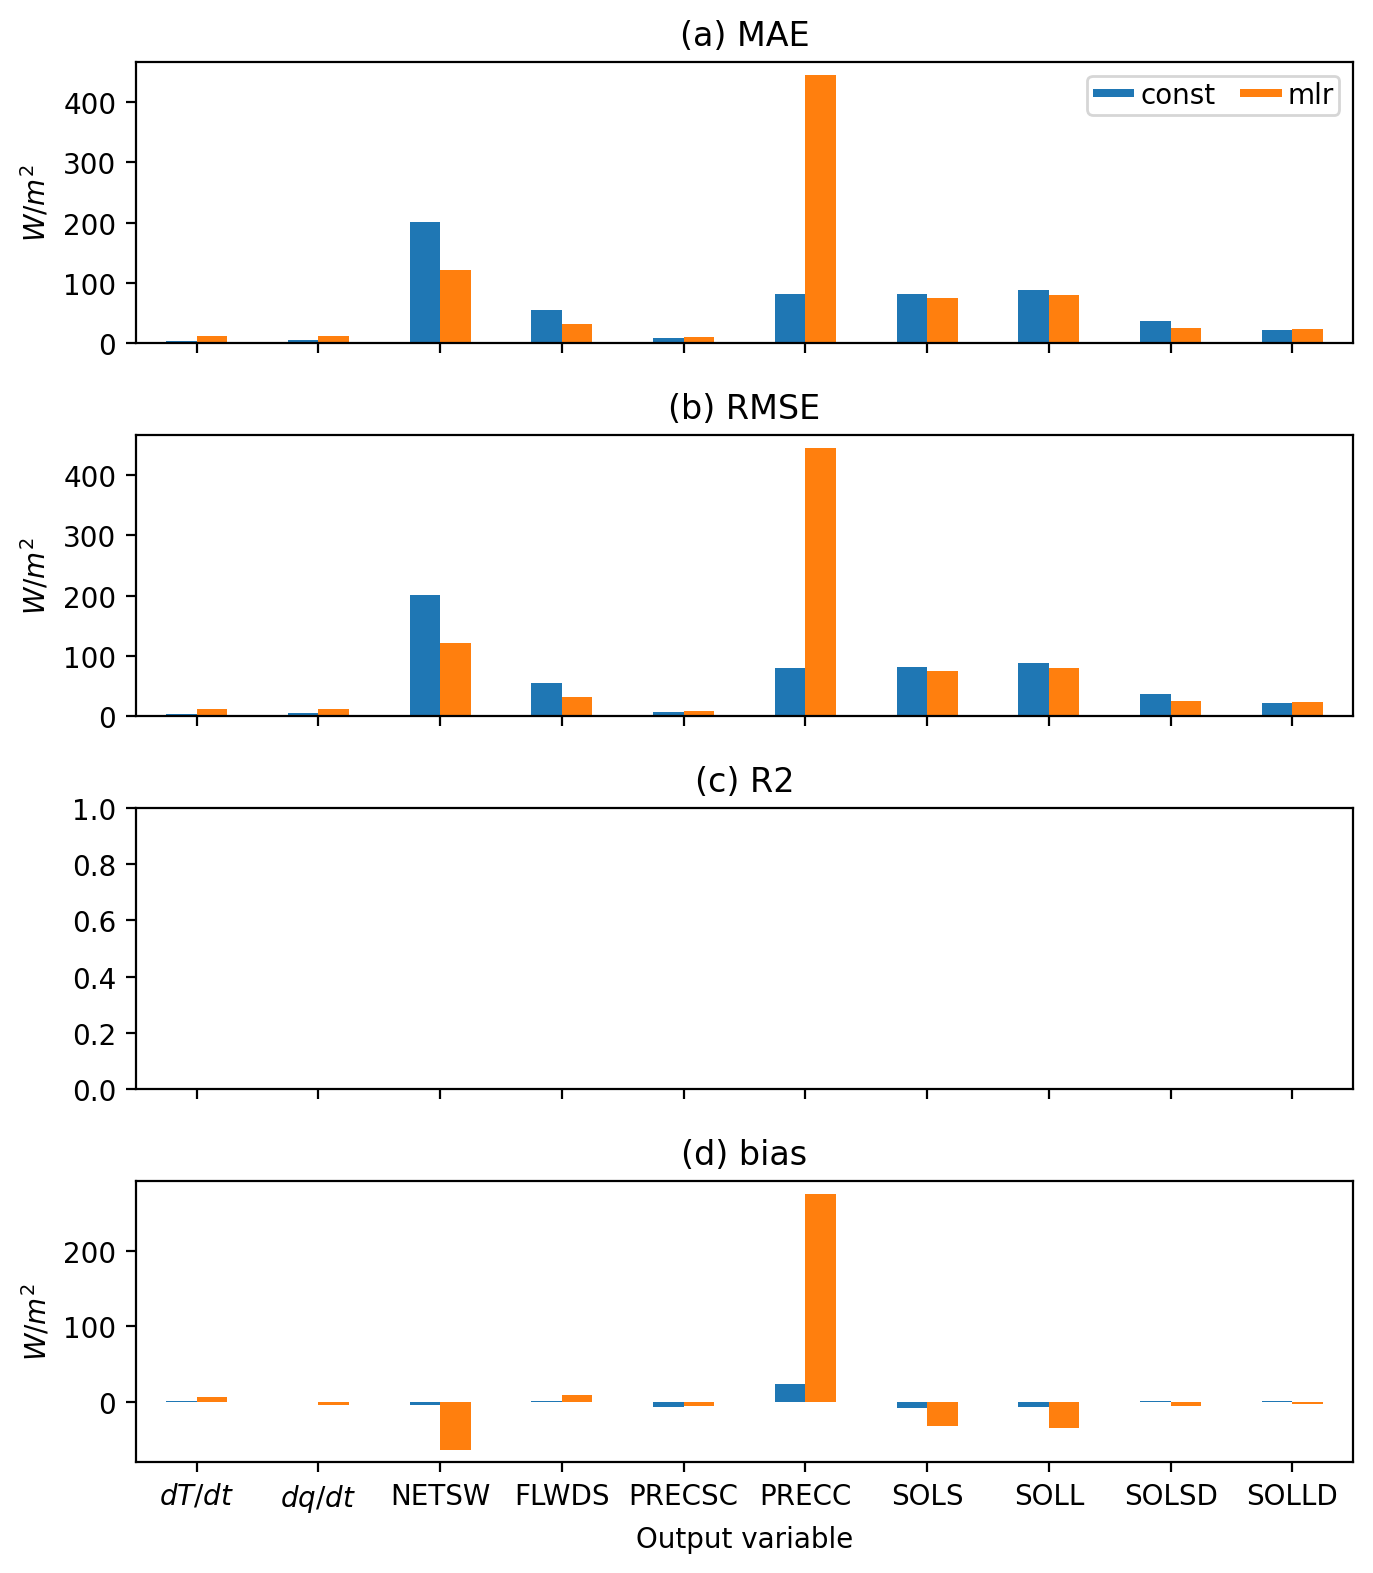

In [92]:
# set plotting settings
%config InlineBackend.figure_format = 'retina'
letters = string.ascii_lowercase

# create custom dictionary for plotting
dict_var = data.metrics_var_scoring
plot_df_byvar = {}
for metric in data.metrics_names:
    plot_df_byvar[metric] = pd.DataFrame([dict_var[model][metric] for model in data.model_names],
                                               index=data.model_names)
    plot_df_byvar[metric] = plot_df_byvar[metric].rename(columns = data.var_short_names).transpose()

# plot figure
fig, axes = plt.subplots(nrows  = len(data.metrics_names), sharex = True)
for i in range(len(data.metrics_names)):
    plot_df_byvar[data.metrics_names[i]].plot.bar(
        legend = False,
        ax = axes[i])
    if data.metrics_names[i] != 'R2':
        axes[i].set_ylabel('$W/m^2$')
    else:
        axes[i].set_ylim(0,1)

    axes[i].set_title(f'({letters[i]}) {data.metrics_names[i]}')
axes[i].set_xlabel('Output variable')
axes[i].set_xticklabels(plot_df_byvar[data.metrics_names[i]].index, \
    rotation=0, ha='center')

axes[0].legend(columnspacing = .9,
               labelspacing = .3,
               handleheight = .07,
               handlelength = 1.5,
               handletextpad = .2,
               borderpad = .2,
               ncol = 3,
               loc = 'upper right')

fig.set_size_inches(7,8)
fig.tight_layout()

In [94]:
"""
import xgboost as xgb
from data_utils import DataLoader


# Load training and validation data
training_data_loader = DataLoader(
    data_path=training_data_path,
    features=features,
    target=target,
    categorical_features=categorical_features,
    embedding_columns=embedding_columns,
    embedding_path=embedding_path
)

validation_data_loader = DataLoader(
    data_path=validation_data_path,
    features=features,
    target=target,
    categorical_features=categorical_features,
    embedding_columns=embedding_columns,
    embedding_path=embedding_path
)
"""


'\nimport xgboost as xgb\nfrom data_utils import DataLoader\n\n\n# Load training and validation data\ntraining_data_loader = DataLoader(\n    data_path=training_data_path,\n    features=features,\n    target=target,\n    categorical_features=categorical_features,\n    embedding_columns=embedding_columns,\n    embedding_path=embedding_path\n)\n\nvalidation_data_loader = DataLoader(\n    data_path=validation_data_path,\n    features=features,\n    target=target,\n    categorical_features=categorical_features,\n    embedding_columns=embedding_columns,\n    embedding_path=embedding_path\n)\n'